==============================================================================================================

# FORECASTING SYSTEM - DEMAND OF PRODUCTS AT A RETAIL OUTLET BASED ON HISTORICAL DATA

==============================================================================================================

### OBJECTIVE:

The aim of this project is to forecast the demand of products at a retail outlet based on historical data .

We use time series analysis to build the forecasting system. 
Here sarimax model is used as the data contains seasonality. 
Prophet model is also used to forecast the demand of products. 

The dataset used here is from kaggle: https://www.kaggle.com/competitions/demand-forecasting-kernels-only/data

=============================================================================================================

## Importing modules ( Numpy,Pandas,Matplotlib,Statsmodels,Warning,Itertools)

=============================================================================================================

In [280]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller,acf,pacf
from functools import reduce

### Setting the display parameters

In [281]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] =14
matplotlib.rcParams['xtick.labelsize'] =12
matplotlib.rcParams['ytick.labelsize'] =12
matplotlib.rcParams['text.color']='k'

### Reading the data set and creating a data frame

In [282]:
df = pd.read_csv('train.csv')
df.head(3)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14


### Unique items

In [283]:
#No of items
x = df['item'].unique()
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


### Stores

In [284]:
#No of stores
x = df['store'].unique()
print(x)

[ 1  2  3  4  5  6  7  8  9 10]


### Correlation and other informations about dataset

In [285]:
df.corr()

,store,item,sales
store,1.000000e+00,7.276042e-15,-0.008170
item,7.276042e-15,1.000000e+00,-0.055998
sales,-8.170361e-03,-5.599807e-02,1.000000


In [286]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


=========================================

### DATA PREPROCESSING ON STORE-1

=========================================

In [287]:
train_1 = df.loc[df['store']==1]
train_1.head(3)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14


In [288]:
len(train_1)

91300

In [289]:
it1 = train_1.loc[train_1['item']==1]
it5 = train_1.loc[train_1['item']==5]
it15= train_1.loc[train_1['item']==15]
it25= train_1.loc[train_1['item']==25]
it30= train_1.loc[train_1['item']==30]
it40= train_1.loc[train_1['item']==40]

#### Item-1 

In [290]:
it1.head(2)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11


#### Item-5 

In [291]:
it5.head(2)

,date,store,item,sales
73040,2013-01-01,1,5,11
73041,2013-01-02,1,5,6


#### Item-15

In [292]:
it15.head(2)

,date,store,item,sales
255640,2013-01-01,1,15,42
255641,2013-01-02,1,15,33


#### Item-25

In [293]:
it25.head(2)

,date,store,item,sales
438240,2013-01-01,1,25,59
438241,2013-01-02,1,25,26


#### Item-30

In [294]:
it30.head(2)

,date,store,item,sales
529540,2013-01-01,1,30,17
529541,2013-01-02,1,30,25


#### Item-40

In [295]:
it40.head(3)

,date,store,item,sales
712140,2013-01-01,1,40,19
712141,2013-01-02,1,40,15
712142,2013-01-03,1,40,12


In [296]:
it1['date'].min()

'2013-01-01'

In [297]:
it1['date'].max()

'2017-12-31'

#### Arranging based on date

In [298]:
it1 = it1.sort_values('date')
it1.head(2)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11


In [299]:
it5 = it5.sort_values('date')
it15 = it15.sort_values('date')
it25 = it25.sort_values('date')
it30 = it30.sort_values('date')
it40 = it40.sort_values('date')
print('Sorted by date')

Sorted by date


#### Checking for missing values

In [300]:
print('Null values for item-1\n',it1.isnull().sum(),'\n')
print('Null values for item-5\n',it5.isnull().sum(),'\n')
print('Null values for item-15\n',it15.isnull().sum(),'\n')
print('Null values for item-25\n',it25.isnull().sum(),'\n')
print('Null values for item-30\n',it30.isnull().sum(),'\n')
print('Null values for item-40\n',it40.isnull().sum(),'\n')

Null values for item-1
 date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-5
 date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-15
 date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-25
 date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-30
 date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-40
 date     0
store    0
item     0
sales    0
dtype: int64 



Note: From the above table we know that there are no null values for all the items therefore dropna() is not needed

#### Parsing dates and grouping items by 'date'

In [301]:
it1['date'] = pd.to_datetime(it1['date'])
it1=it1.groupby('date')['sales'].sum().reset_index()
it1.head(2)

,date,sales
0,2013-01-01,13
1,2013-01-02,11


In [302]:
it5['date'] = pd.to_datetime(it5['date'])
it5=it5.groupby('date')['sales'].sum().reset_index()
it15['date'] = pd.to_datetime(it15['date'])
it15=it15.groupby('date')['sales'].sum().reset_index()
it25['date'] = pd.to_datetime(it25['date'])
it25=it25.groupby('date')['sales'].sum().reset_index()
it30['date'] = pd.to_datetime(it30['date'])
it30=it30.groupby('date')['sales'].sum().reset_index()
it40['date'] = pd.to_datetime(it40['date'])
it40=it40.groupby('date')['sales'].sum().reset_index()

#### Setting index

In [303]:
it1 =it1.set_index('date')
it1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=1826, freq=None)

In [304]:
y1 = it1['sales'].resample('MS').mean()
print('Item-1\n',y1['2017-05':],'\n')
it5=it5.set_index('date')
y5 = it5['sales'].resample('MS').mean()
print('Item-5\n',y5['2017-07':],'\n')
it15=it15.set_index('date')
y15 = it15['sales'].resample('MS').mean()
it25=it25.set_index('date')
y25 = it25['sales'].resample('MS').mean()
it30=it30.set_index('date')
y30 = it30['sales'].resample('MS').mean()
it40=it40.set_index('date')
y40 = it40['sales'].resample('MS').mean()

Item-1
 date
2017-05-01    24.935484
2017-06-01    28.333333
2017-07-01    28.161290
2017-08-01    25.612903
2017-09-01    24.533333
2017-10-01    21.290323
2017-11-01    22.266667
2017-12-01    17.193548
Freq: MS, Name: sales, dtype: float64 

Item-5
 date
2017-07-01    22.548387
2017-08-01    20.548387
2017-09-01    19.633333
2017-10-01    18.225806
2017-11-01    19.166667
2017-12-01    14.064516
Freq: MS, Name: sales, dtype: float64 



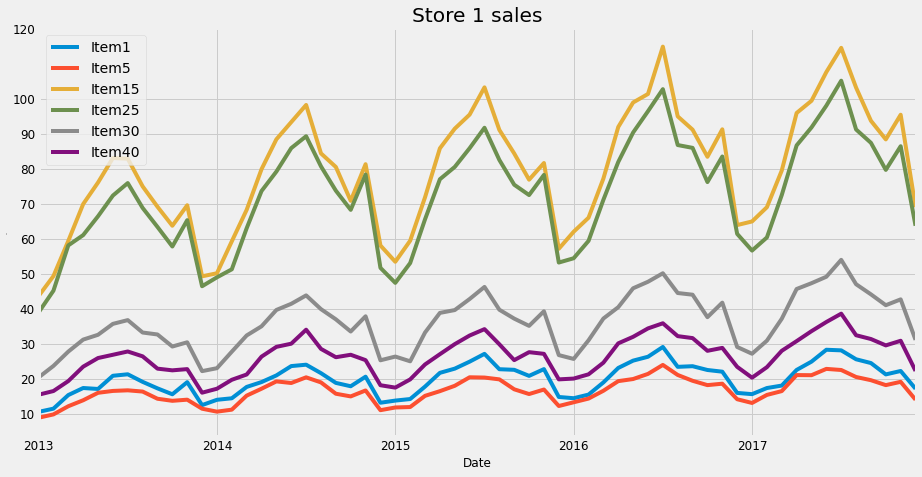

In [305]:
y1.plot(figsize=(14,7),label='Item1')
y5.plot(figsize=(14,7),label='Item5')
y15.plot(figsize=(14,7),label='Item15')
y25.plot(figsize=(14,7),label='Item25')
y30.plot(figsize=(14,7),label='Item30')
y40.plot(figsize=(14,7),label='Item40')
plt.title('Store 1 sales')
plt.title('Store 1 sales')
plt.yticks([10,20,30,40,50,60,70,80,90,100,120])
plt.xlabel('Date',fontdict={'fontsize':12})
plt.ylabel('Sales',fontdict={'fontsize':1})
plt.legend()
plt.show()

### Stationarity check on item 1 in store 1 using decomposition

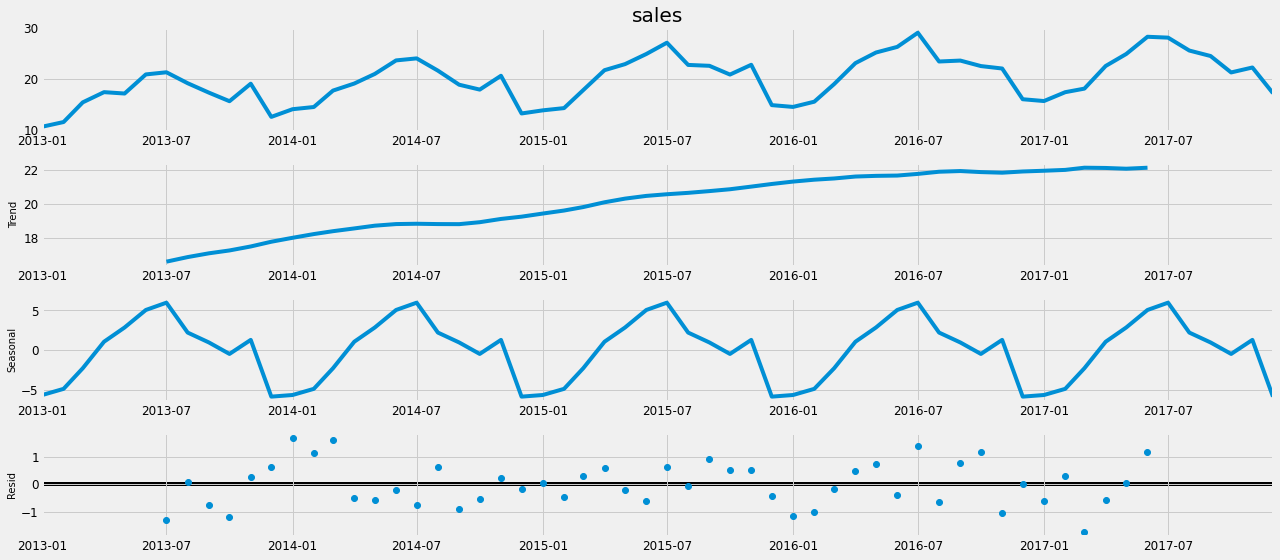

In [306]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
rcParams['axes.labelsize']=10
decomposition = sm.tsa.seasonal_decompose(y1,model='additive')
fig=decomposition.plot()
plt.show()

In [307]:
new_df = pd.concat([decomposition.seasonal,decomposition.trend,decomposition.resid,decomposition.observed],axis=1)
new_df.columns = ['Seasonal','Trend','Residue','Observed']
new_df.head(3)

,Seasonal,Trend,Residue,Observed
date,,,,
2013-01-01,-5.687099,NaN,NaN,10.580645
2013-02-01,-4.911379,NaN,NaN,11.500000
2013-03-01,-2.306801,NaN,NaN,15.387097


It can be noted that the plot is not stationary and it has a seasonal component

================================

## Performing adfuller test

================================

In [308]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    print(dfoutput)

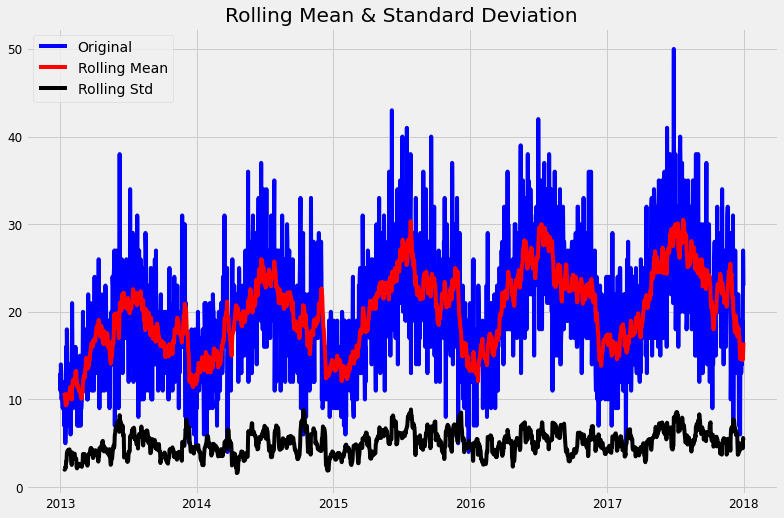

Results of Dickey-Fuller Test:
p-value = 0.0361. The series is likely non-stationary.
Test Statistic                   -2.987278
p-value                           0.036100
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


In [309]:
test_stationarity(it1['sales'])

### Adfuller test on first differencing

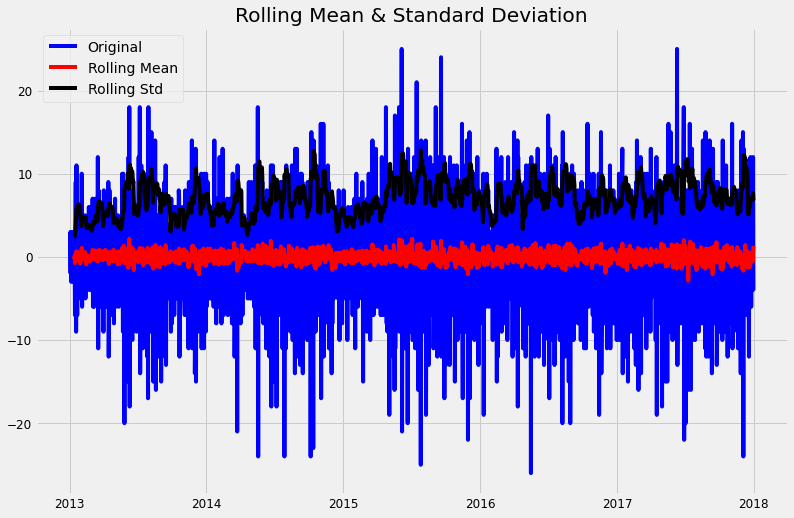

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.520810e+01
p-value                        5.705031e-28
#Lags Used                     2.000000e+01
Number of Observations Used    1.804000e+03
Critical Value (1%)           -3.433980e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


In [310]:
diff_1 = it1.sales - it1.sales.shift(1)
diff_1 = diff_1.dropna(inplace= False)
test_stationarity(diff_1,window=12)

From the above plots it can be seen that the first differencing gives a stationary series

### Pacf and Acf plots

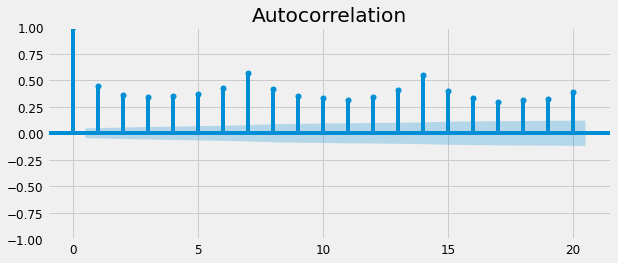

In [312]:
fig = plt.figure(figsize=(9,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(it1.sales, lags=20, ax=ax1)

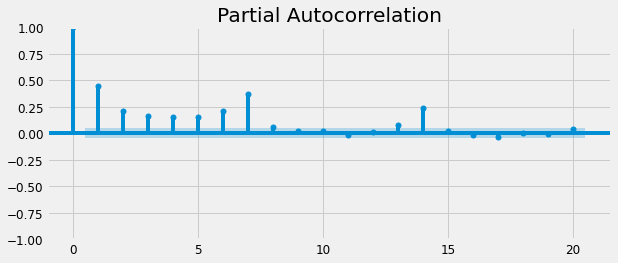

In [313]:
fig = plt.figure(figsize=(9,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(it1.sales, lags=20, ax=ax2)

Because there is a pattern at 7, 14, 21 .. intervals we use sarima model as it is seasonal

## 1.Values using acf and pacf

### Finding p,d,q values

1.First order differencing makes the time series stationary therefore d =1 

2.We can see a pattern after every 6 lags therefore the value of p = 6 

3.We take MA order (i.e) q=0 as to avoid incorrect value 

In [314]:
arima_model = sm.tsa.SARIMAX(it1,trend='n',order=(6,1,0)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1826
Model:               SARIMAX(6, 1, 0)   Log Likelihood               -5597.679
Date:                Tue, 09 Aug 2022   AIC                          11209.359
Time:                        15:21:35   BIC                          11247.924
Sample:                    01-01-2013   HQIC                         11223.585
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8174      0.021    -39.063      0.000      -0.858      -0.776
ar.L2         -0.7497      0.025    -30.480      0.000      -0.798      -0.702
ar.L3         -0.6900      0.026    -26.686      0.000      -0.741      -0.639
ar.L4         -0.6138      0.027    -22.743      0.000      -0.667      -0.561
ar.L5         -0.5247      0.025    -21.199      0.000      -0.573      -0.476
ar.L6         -0.3892      0.021    -18.819      0.000      -0.430      -0.349
sigma2        26.9896      0.817     33.037      0.000      25.388      28.591
===================================================================================
Ljung-Box (L1) (Q):                   1.41   Jarque-Bera (JB):                19.53
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 2.Using for loop method

In [315]:
pdq_new = []
seasonal_pdq_new = []
aic = []

In [316]:
p=range(0,2)
d=range(0,2)
q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[2]))
print('SARIMAX:{} x {}'.format(pdq[3],seasonal_pdq[3]))
print('SARIMAX:{} x {}'.format(pdq[4],seasonal_pdq[4]))
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y1,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,
            enforce_invertibility=False)
            results=mod.fit()
            pdq_new.append(param)
            seasonal_pdq_new.append(param_seasonal)
            aic.append(results.aic)
            print('ARIMA{}x{}12 - ATC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX:(0, 0, 1) x (0, 0, 1, 12)
SARIMAX:(0, 1, 0) x (0, 1, 0, 12)
SARIMAX:(0, 1, 1) x (0, 1, 1, 12)
SARIMAX:(1, 0, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - ATC:526.2351928268366
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - ATC:387.5719203827013
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - ATC:192.87416216024954
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - ATC:1613.6186011044445
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - ATC:168.77658941248504
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - ATC:163.96888514697832
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - ATC:125.85326363135084
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - ATC:1577.5284845853641
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - ATC:455.8698594091883
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - ATC:331.339153774595
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - ATC:173.16063029850508
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - ATC:1389.8567717834278
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - ATC:171.44972700007366
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - ATC:160.7732453855461
ARIMA(0, 0, 1)x(1, 1, 0, 12)1

In [317]:
d = { 'pdq': pdq_new, ' seasonal pdq': seasonal_pdq_new, 'aic_new': aic}
aic_df = pd.DataFrame(data = d)
aic_df.sort_values(["aic_new"],axis=0,inplace=True)
aic_df.head(1)

,pdq,seasonal pdq,aic_new
62,"(1, 1, 1)","(1, 1, 0, 12)",112.967844


We add the aic values after testing for every combinations on pdq and seasonal pdq values into the arrays pdq_new , seasonal_pdq_new, aic_new.From these arrays we select the pdq and seasonal pdq order such that aic value is minimum

===========================

## Training the model

===========================

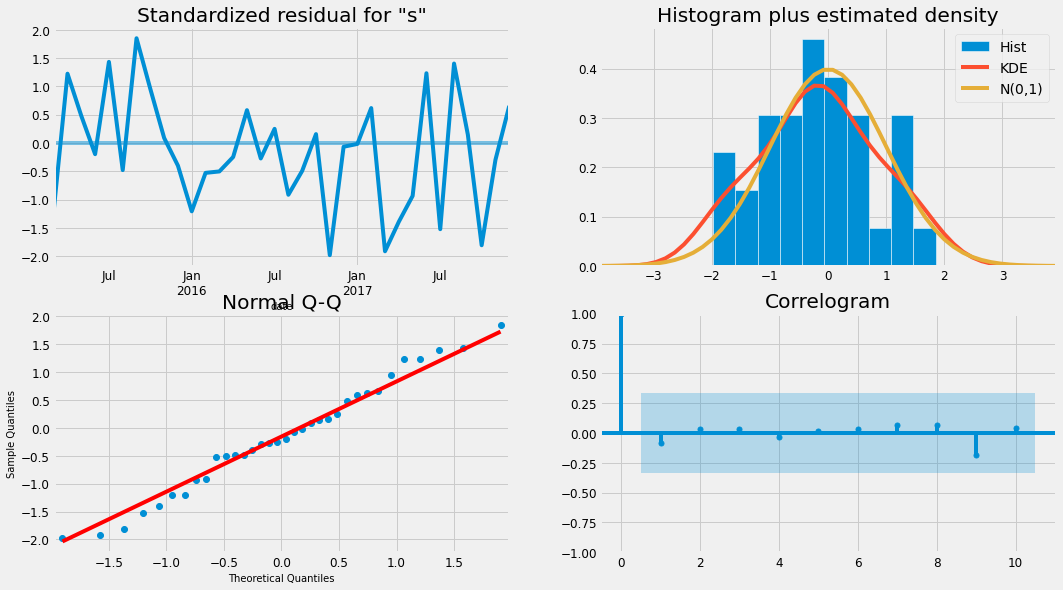

In [318]:
mod=sm.tsa.statespace.SARIMAX(y1,order=(1,1,1),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results=mod.fit()
results.plot_diagnostics(figsize=(16,9))
plt.show()

=======================================

## Prediction on trained model

=======================================

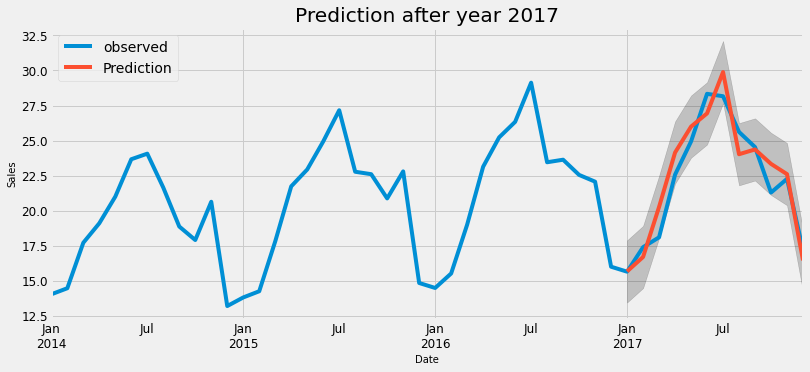

In [350]:
pred=results.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax1=y1['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax1,xlabel = 'Date', ylabel = 'Sales', label='Prediction',figsize=(12,5))
ax1.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k' ,alpha=.2)
plt.legend()
plt.title('Prediction after year 2017')
plt.show()

#### Prediction on test.csv dataset

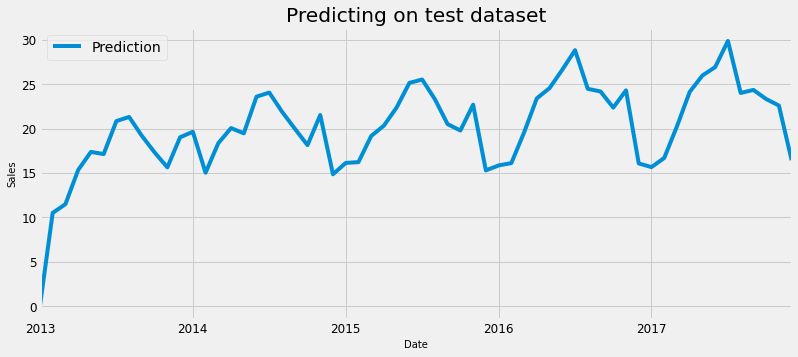

In [349]:
test = pd.read_csv('test.csv')
test_it1 = test.loc[test['store']==1]
test_it1 = test_it1.loc[test_it1['item']==1]
test_it1 = test_it1.sort_values('date')
test_it1['date']=pd.to_datetime(test_it1['date'])
pred2 = results.get_prediction(data = test_it1)
pred2.predicted_mean.plot(xlabel='Date',ylabel='Sales',label='Prediction',figsize=(12,5),legend=True)
plt.title('Predicting on test dataset')
plt.show()

## Forecasting on future dates

In [321]:
it1.tail(1)

,sales
date,
2017-12-31,23


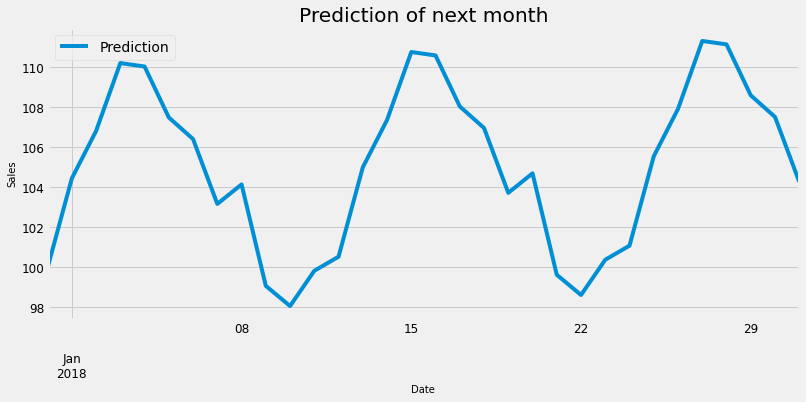

In [322]:
fut_dates = pd.date_range(start='2017-12-31',end = '2018-01-31')
fut_model = results.predict(start = len(it1) , end = len(it1)+31)
fut_model.index = fut_dates
fut_model.plot(figsize=(12,5),label='Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prediction of next month')
plt.legend()
plt.show()

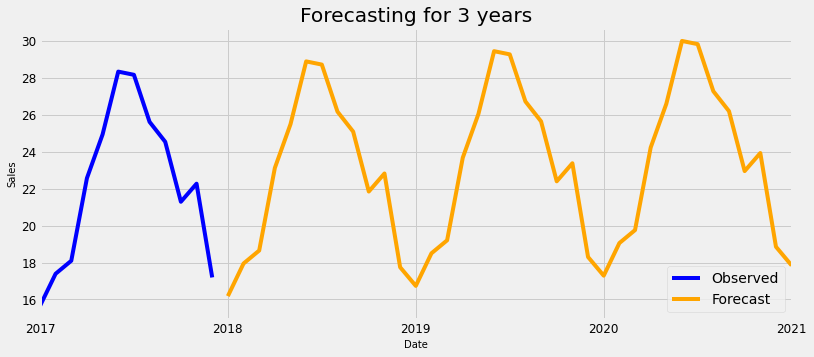

In [348]:
fut_model2= results.forecast(steps=37)
ax1 = y1['2017':].plot(color='blue',label='Observed')
fut_model2.plot(ax=ax1,figsize=(12,5),label='Forecast',color = 'orange',xlabel='Date',ylabel='Sales')
plt.title('Forecasting for 3 years')
plt.legend()
plt.show()

======================================

## Comparison with other items

======================================

In [324]:
cmp1_5 = it1.merge(it5, on= 'date' , how = 'inner')
cmp1_5.rename(columns={'sales_x':'Item_1 Sales','sales_y':'Item_5 Sales'},inplace=True)
cmp1_5.head()

,Item_1 Sales,Item_5 Sales
date,,
2013-01-01,13,11
2013-01-02,11,6
2013-01-03,14,8
2013-01-04,13,9
2013-01-05,10,8


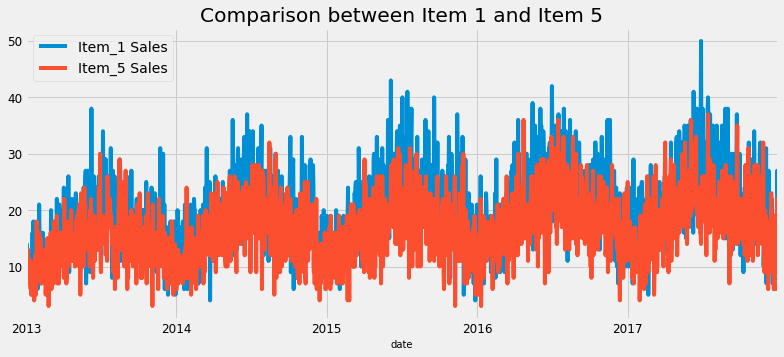

In [351]:
cmp1_5.plot(figsize=(12,5))
plt.title('Comparison between Item 1 and Item 5')
plt.show()

In [326]:
dfs = [it1,it5,it15,it25,it30,it40]
st1 = it1.merge(it5, on ='date', how = 'inner')
st1.rename(columns={'sales_x':'Item_1 Sales','sales_y':'Item_5 Sales'},inplace=True)
st1 = st1.merge(it15, on ='date', how ='inner')
st1 = st1.merge(it25, on ='date', how ='inner')
st1.rename(columns={'sales_x':'Item_15 Sales','sales_y':'Item_25 Sales'},inplace=True)
st1 = st1.merge(it30, on ='date', how ='inner')
st1 = st1.merge(it40, on ='date', how ='inner')
st1.rename(columns={'sales_x':'Item_30 Sales','sales_y':'Item_40 Sales'},inplace=True)
st1.head()

,Item_1 Sales,Item_5 Sales,Item_15 Sales,Item_25 Sales,Item_30 Sales,Item_40 Sales
date,,,,,,
2013-01-01,13,11,42,59,17,19
2013-01-02,11,6,33,26,25,15
2013-01-03,14,8,45,42,25,12
2013-01-04,13,9,39,35,27,13
2013-01-05,10,8,47,45,22,19


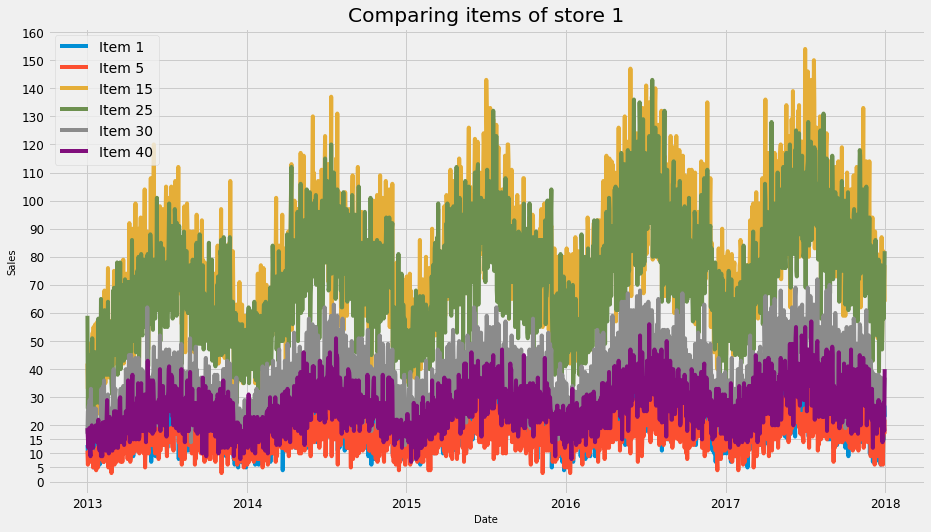

In [327]:
plt.figure(figsize=(14,8))
plt.plot(st1.index,st1['Item_1 Sales'],label='Item 1',)
plt.plot(st1.index,st1['Item_5 Sales'],label='Item 5')
plt.plot(st1.index,st1['Item_15 Sales'],label='Item 15')
plt.plot(st1.index,st1['Item_25 Sales'],label='Item 25')
plt.plot(st1.index,st1['Item_30 Sales'],label='Item 30')
plt.plot(st1.index,st1['Item_40 Sales'],label='Item 40')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.yticks([0,5,10,15,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160])
plt.legend()
plt.title('Comparing items of store 1')
plt.show()

=======================================

## Forecasting with prophet model

=======================================

In [328]:
from prophet import Prophet

### Prophet model for item 1

In [329]:
it1_model = Prophet(interval_width=0.95)
it1.reset_index(inplace =True)
it1.rename(columns={'date':'ds','sales':'y'},inplace=True)
it1_model.fit(it1)

15:21:53 - cmdstanpy - INFO - Chain [1] start processing
15:21:53 - cmdstanpy - INFO - Chain [1] done processing


### Prophet model for item 5

In [330]:
it5_model = Prophet(interval_width=0.95)
it5.reset_index(inplace =True)
it5.rename(columns={'date':'ds','sales':'y'},inplace=True)
it5_model.fit(it5)

15:21:54 - cmdstanpy - INFO - Chain [1] start processing
15:21:54 - cmdstanpy - INFO - Chain [1] done processing


### Forecasting for item-1

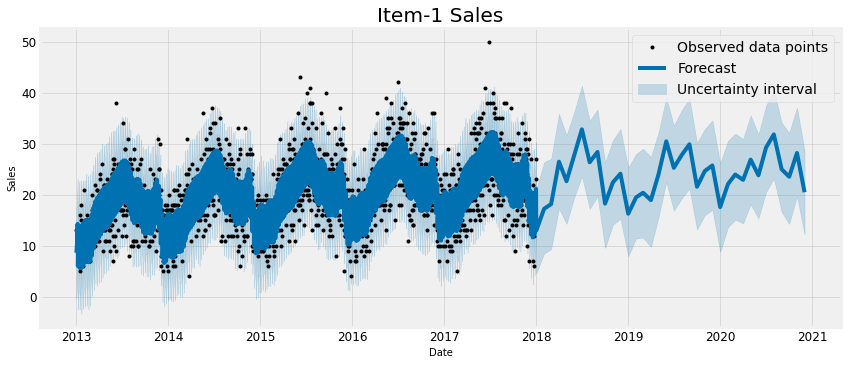

In [331]:
item1_forecast = it1_model.make_future_dataframe(periods = 36,freq = 'MS')
item1_forecast = it1_model.predict(item1_forecast)
it1_model.plot(item1_forecast,xlabel ='Date', ylabel ='Sales',figsize=(12,5))
plt.title('Item-1 Sales')
plt.legend()

### Forecasting for item-5

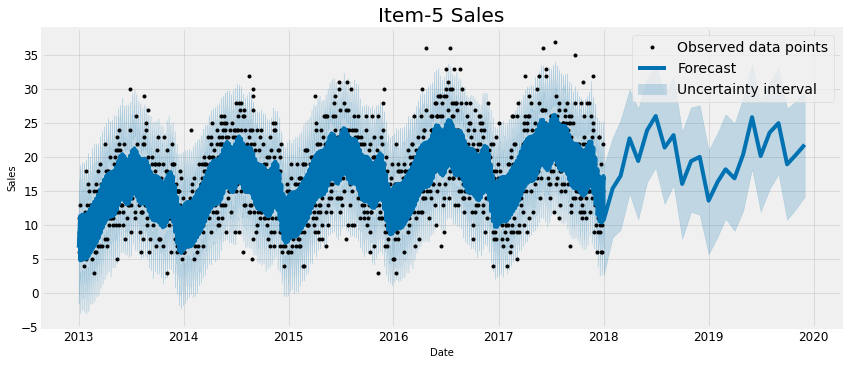

In [332]:
item5_forecast = it5_model.make_future_dataframe(periods = 24,freq = 'MS')
item5_forecast = it5_model.predict(item5_forecast)
it5_model.plot(item5_forecast,xlabel ='Date', ylabel ='Sales',figsize=(12,5))
plt.title('Item-5 Sales')
plt.legend()

===========================

## Visualising trends 

===========================

#### For item 1 model

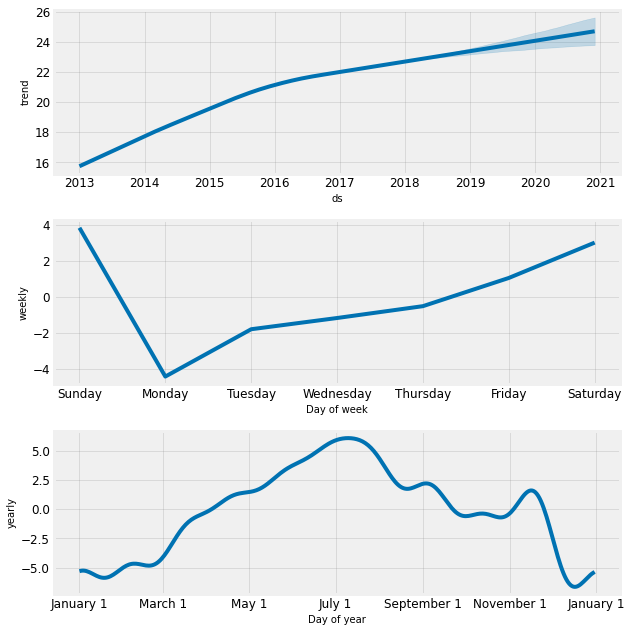

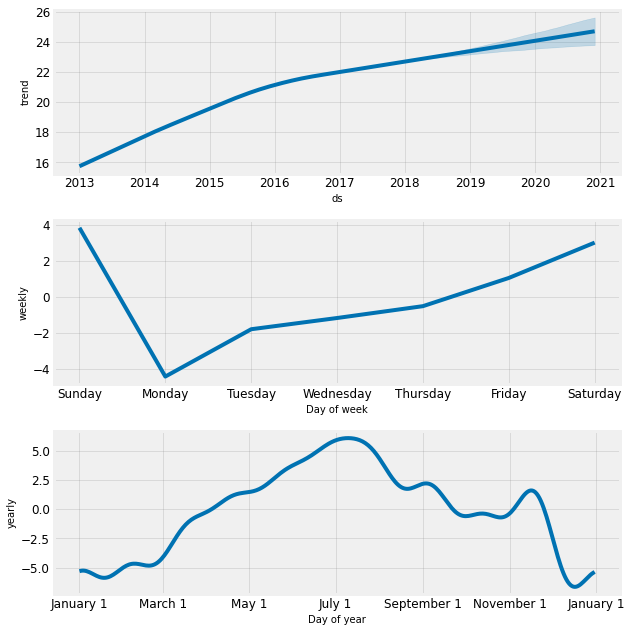

In [333]:
it1_model.plot_components(item1_forecast)

=========================

### Performance metrics

=========================

In [335]:
from prophet.diagnostics import cross_validation,performance_metrics

In [336]:
it1_model_cv = cross_validation(it1_model,initial = '730 days',period = '180 days',horizon = '365 days')
it1_model_cv.head(3)

  0%|          | 0/5 [00:00<?, ?it/s]

15:22:03 - cmdstanpy - INFO - Chain [1] start processing
15:22:03 - cmdstanpy - INFO - Chain [1] done processing
15:22:05 - cmdstanpy - INFO - Chain [1] start processing
15:22:05 - cmdstanpy - INFO - Chain [1] done processing
15:22:07 - cmdstanpy - INFO - Chain [1] start processing
15:22:07 - cmdstanpy - INFO - Chain [1] done processing
15:22:09 - cmdstanpy - INFO - Chain [1] start processing
15:22:10 - cmdstanpy - INFO - Chain [1] done processing
15:22:12 - cmdstanpy - INFO - Chain [1] start processing
15:22:12 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-12,11.481298,4.078945,19.901745,9,2015-01-11
1,2015-01-13,13.429155,5.445964,21.292625,9,2015-01-11
2,2015-01-14,14.310615,6.301861,21.817793,15,2015-01-11


In [337]:
it1_model_pm = performance_metrics(it1_model_cv)
it1_model_pm.head(3)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,21.483672,4.635048,3.767777,0.243642,0.152087,0.207401,0.934066
1,38 days,21.558716,4.643136,3.759948,0.245423,0.152087,0.207960,0.931868
2,39 days,21.595910,4.647140,3.765746,0.245502,0.146385,0.208111,0.928571


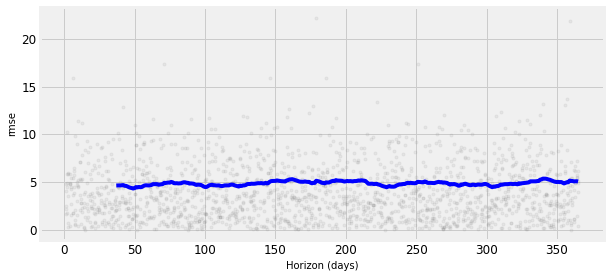

In [353]:
from prophet.plot import plot_cross_validation_metric
figure = plot_cross_validation_metric(it1_model_cv,metric = 'rmse',figsize =(9,4))

===============================================================================================================

## DATA PREPROCESSING ON STORE-5

================================================================================================================

In [339]:
train_5 = df.loc[df['store']==5]
train_5.head(2)

,date,store,item,sales
7304,2013-01-01,5,1,11
7305,2013-01-02,5,1,9


In [340]:
len(train_5)

91300

In [341]:
ite1 = train_5.loc[train_5['item']==1]
ite5 = train_5.loc[train_5['item']==5]
ite15= train_5.loc[train_5['item']==15]
ite25= train_5.loc[train_5['item']==25]
ite30= train_5.loc[train_5['item']==30]
ite40= train_5.loc[train_5['item']==40]

In [342]:
ite1 = ite1.sort_values('date')
ite1.head(2)

,date,store,item,sales
7304,2013-01-01,5,1,11
7305,2013-01-02,5,1,9


In [354]:
ite5 = ite5.sort_values('date')
ite15 = ite15.sort_values('date')
ite25 = ite25.sort_values('date')
ite30 = ite30.sort_values('date')
ite40 = ite40.sort_values('date')
print('Sorted by date')

Sorted by date


#### Checking for null values

In [355]:
print('Null values for item-1')
print(ite1.isnull().sum(),'\n')
print('Null values for item-5')
print(ite5.isnull().sum(),'\n')
print('Null values for item-15')
print(ite15.isnull().sum(),'\n')
print('Null values for item-25')
print(ite25.isnull().sum(),'\n')
print('Null values for item-30')
print(ite30.isnull().sum(),'\n')
print('Null values for item-40')
print(ite40.isnull().sum(),'\n')

Null values for item-1
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-5
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-15
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-25
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-30
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-40
date     0
store    0
item     0
sales    0
dtype: int64 



#### Parsing dates and grouping items by 'date'

In [356]:
ite1['date'] = pd.to_datetime(ite1['date'])
ite1=ite1.groupby('date')['sales'].sum().reset_index()
ite1.head(2)

,date,sales
0,2013-01-01,11
1,2013-01-02,9


In [357]:
ite5['date'] = pd.to_datetime(ite5['date'])
ite5=ite5.groupby('date')['sales'].sum().reset_index()
ite15['date'] = pd.to_datetime(ite15['date'])
ite15=ite15.groupby('date')['sales'].sum().reset_index()
ite25['date'] = pd.to_datetime(ite25['date'])
ite25=ite25.groupby('date')['sales'].sum().reset_index()
ite30['date'] = pd.to_datetime(ite30['date'])
ite30=ite30.groupby('date')['sales'].sum().reset_index()
ite40['date'] = pd.to_datetime(ite40['date'])
ite40=ite40.groupby('date')['sales'].sum().reset_index()

In [358]:
ite1=ite1.set_index('date')
x1 = ite1['sales'].resample('MS').mean()
ite5=ite5.set_index('date')
x5 = ite5['sales'].resample('MS').mean()
ite15=ite15.set_index('date')
x15 = ite15['sales'].resample('MS').mean()
ite25=ite25.set_index('date')
x25 = ite25['sales'].resample('MS').mean()
ite30=ite30.set_index('date')
x30 = ite30['sales'].resample('MS').mean()
ite40=ite40.set_index('date')
x40 = ite40['sales'].resample('MS').mean()
ite5.head(2)

,sales
date,
2013-01-01,9
2013-01-02,5


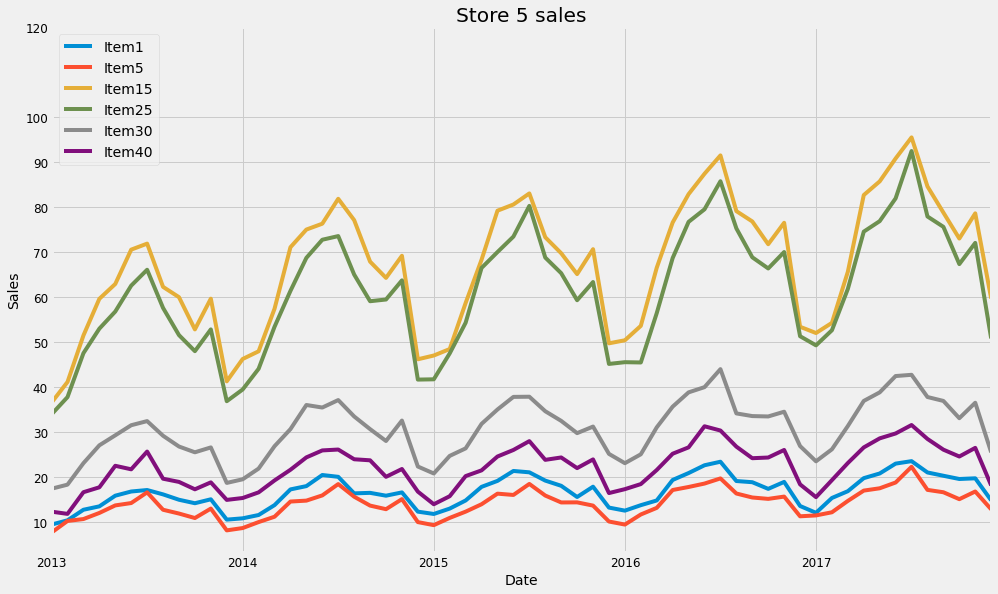

In [360]:
x1.plot(figsize=(15,9),label='Item1')
x5.plot(figsize=(15,9),label='Item5')
x15.plot(figsize=(15,9),label='Item15')
x25.plot(figsize=(15,9),label='Item25')
x30.plot(figsize=(15,9),label='Item30')
x40.plot(figsize=(15,9),label='Item40')
plt.title('Store 5 sales')
plt.yticks([10,20,30,40,50,60,70,80,90,100,120])
plt.xlabel('Date',fontdict={'fontsize':14})
plt.ylabel('Sales',fontdict={'fontsize':14})
plt.legend()
plt.show()

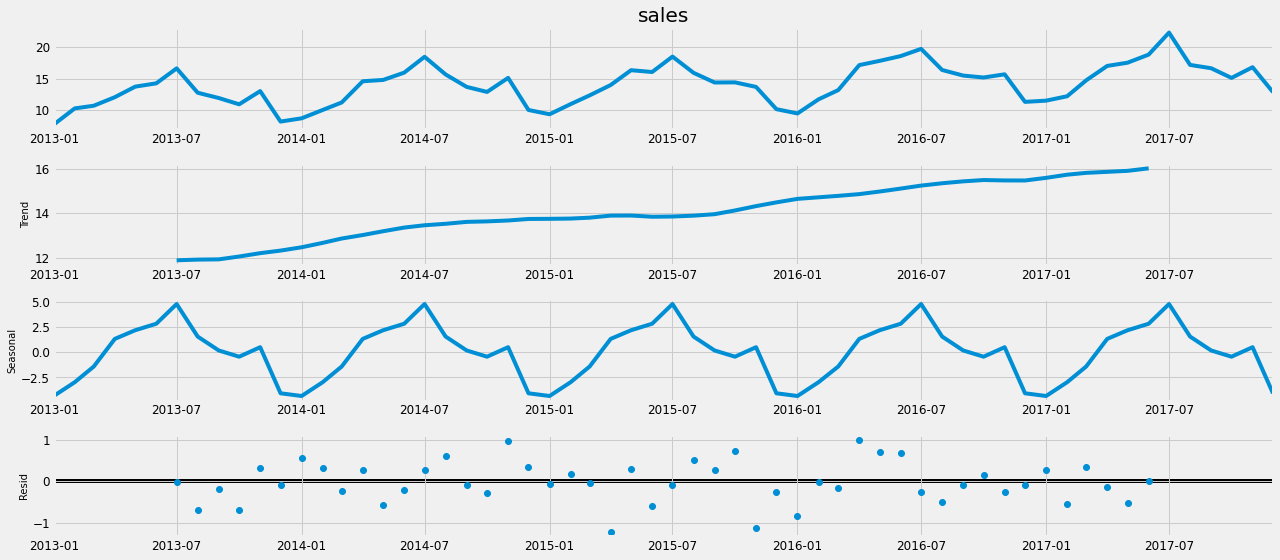

In [361]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
rcParams['axes.labelsize']=10
decomposition = sm.tsa.seasonal_decompose(x5,model='additive')
fig=decomposition.plot()
plt.show()

========================================

## For loop (p,d,q values)

========================================

In [362]:
pdq_new1 = []
seasonal_pdq_new1 = []
aic1 = []

In [363]:
p=range(0,2)
d=range(0,2)
q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[2]))
print('SARIMAX:{} x {}'.format(pdq[3],seasonal_pdq[3]))
print('SARIMAX:{} x {}'.format(pdq[4],seasonal_pdq[4]))
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(x5,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,
            enforce_invertibility=False)
            results_st5=mod.fit()
            pdq_new1.append(param)
            seasonal_pdq_new1.append(param_seasonal)
            aic1.append(results_st5.aic)
            print('ARIMA{}x{}12 - ATC:{}'.format(param,param_seasonal,results_st5.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX:(0, 0, 1) x (0, 0, 1, 12)
SARIMAX:(0, 1, 0) x (0, 1, 0, 12)
SARIMAX:(0, 1, 1) x (0, 1, 1, 12)
SARIMAX:(1, 0, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - ATC:485.0084291164615
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - ATC:355.4078607860751
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - ATC:168.80179159023442
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - ATC:1465.303856202486
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - ATC:139.9274174506317
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - ATC:120.56871505072718
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - ATC:121.4914104081842
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - ATC:1498.3611763154893
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - ATC:414.90468322514107
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - ATC:302.4807148285411
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - ATC:156.394270486915
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - ATC:1642.4011075071796
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - ATC:140.42264961487678
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - ATC:119.20755996936879
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 

In [364]:
d = { 'pdq': pdq_new1, ' seasonal pdq': seasonal_pdq_new1, 'aic_new': aic1}
aic_df = pd.DataFrame(data = d)
aic_df.sort_values(["aic_new"],axis=0,inplace=True)
aic_df.head(1)

,pdq,seasonal pdq,aic_new
62,"(1, 1, 1)","(1, 1, 0, 12)",89.103551


==========================

## Training the model

==========================

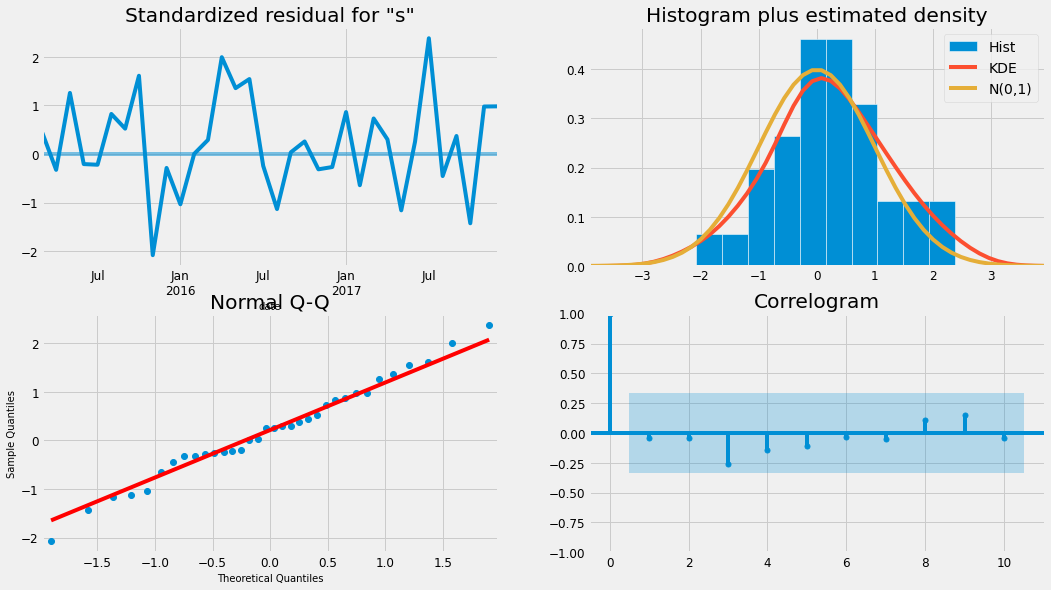

In [365]:
mod=sm.tsa.statespace.SARIMAX(x5,order=(1,1,1),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results_st5=mod.fit()
results_st5.plot_diagnostics(figsize=(16,9))
plt.show()

=========================================

## Prediction on trained model

=========================================

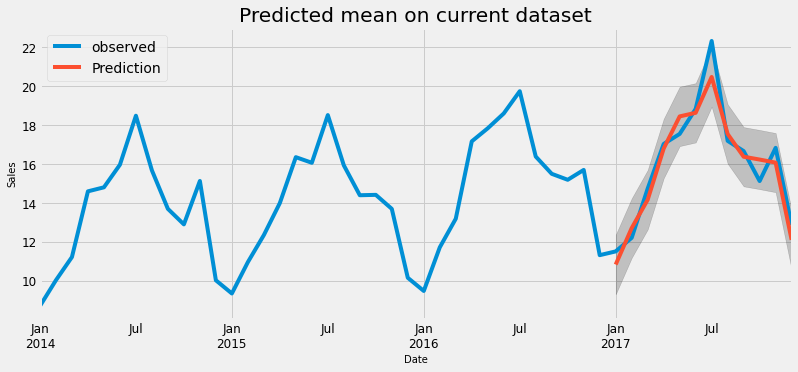

In [383]:
pred=results_st5.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax1=x5['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax1,xlabel = 'Date', ylabel = 'Sales', label='Prediction',figsize=(12,5))
ax1.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k' ,alpha=.2)
plt.title('Predicted mean on current dataset')
plt.legend()
plt.show()

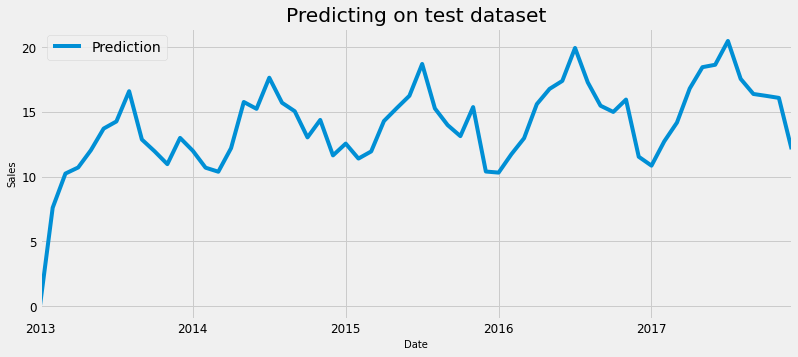

In [384]:
test = pd.read_csv('test.csv')
test_it5 = test.loc[test['store']==5]
test_it5 = test_it5.loc[test_it5['item']==5]
test_it5 = test_it5.sort_values('date')
test_it5['date']=pd.to_datetime(test_it5['date'])
pred2 = results_st5.get_prediction(data = test_it5)
pred2.predicted_mean.plot(xlabel='Date',ylabel='Sales',label='Prediction',figsize=(12,5),legend=True)
plt.title('Predicting on test dataset')
plt.show()

## Forecasting on future dates

In [368]:
ite5.tail(1)

,sales
date,
2017-12-31,17


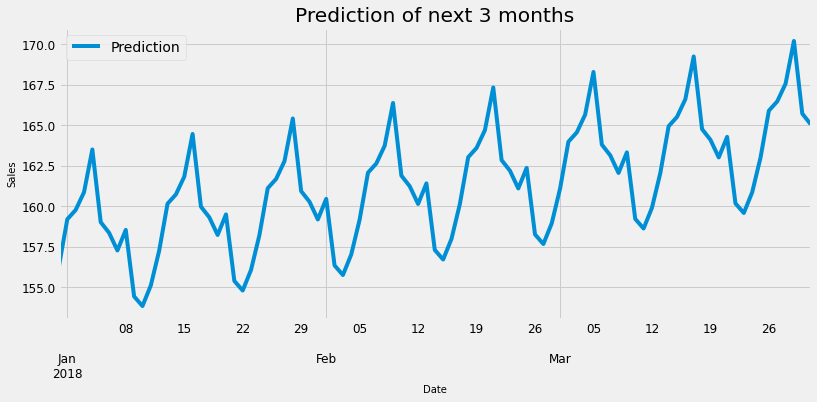

In [385]:
fut_dates = pd.date_range(start='2017-12-31',end = '2018-03-31')
fut_model = results_st5.predict(start = len(ite5) , end = len(ite5)+90)
fut_model.index = fut_dates
fut_model.plot(figsize=(12,5),label='Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prediction of next 3 months')
plt.legend()
plt.show()

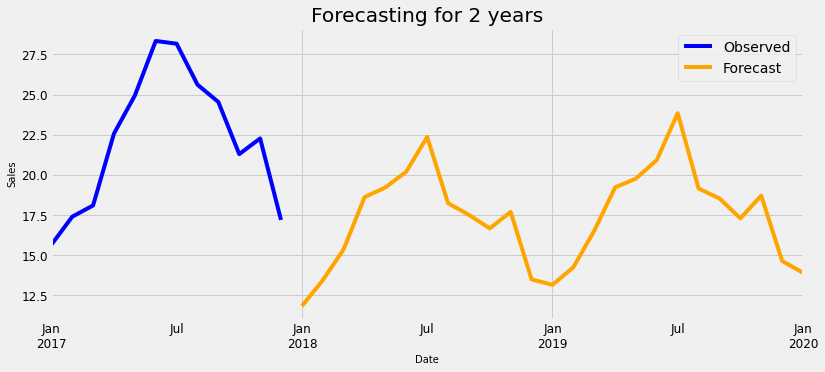

In [386]:
fut_model2= results_st5.forecast(steps=25)
ax1 = y1['2017':].plot(color='blue',label='Observed')
fut_model2.plot(ax=ax1,figsize=(12,5),label='Forecast',color = 'orange',xlabel='Date',ylabel='Sales')
plt.title('Forecasting for 2 years')
plt.legend()
plt.show()

=======================================

## Comparison with other items

=======================================

In [371]:
st5 = ite1.merge(ite5, on ='date', how = 'inner')
st5.rename(columns={'sales_x':'Item-1 Sales','sales_y':'Item-5 Sales'},inplace=True)
st5 = st5.merge(ite15, on ='date', how ='inner')
st5 = st5.merge(ite25, on ='date', how ='inner')
st5.rename(columns={'sales_x':'Item-15 Sales','sales_y':'Item-25 Sales'},inplace=True)
st5 = st5.merge(ite30, on ='date', how ='inner')
st5 = st5.merge(ite40, on ='date', how ='inner')
st5.rename(columns={'sales_x':'Item-30 Sales','sales_y':'Item-40 Sales'},inplace=True)
st5.head()

,Item-1 Sales,Item-5 Sales,Item-15 Sales,Item-25 Sales,Item-30 Sales,Item-40 Sales
date,,,,,,
2013-01-01,11,9,31,37,16,18
2013-01-02,9,5,31,39,17,10
2013-01-03,12,3,32,40,18,14
2013-01-04,8,12,37,38,19,10
2013-01-05,13,8,43,32,9,9


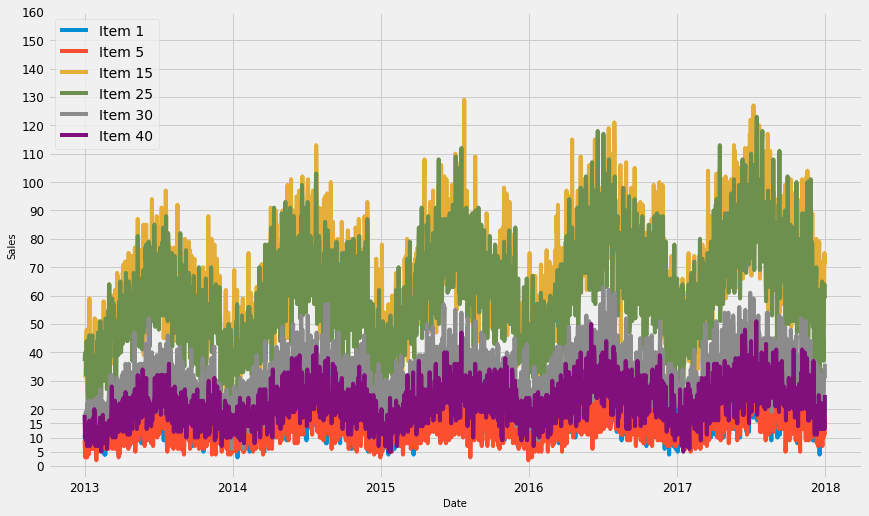

In [387]:
plt.figure(figsize=(13,8))
plt.plot(st5.index,st5['Item-1 Sales'],label='Item 1',)
plt.plot(st5.index,st5['Item-5 Sales'],label='Item 5')
plt.plot(st5.index,st5['Item-15 Sales'],label='Item 15')
plt.plot(st5.index,st5['Item-25 Sales'],label='Item 25')
plt.plot(st5.index,st5['Item-30 Sales'],label='Item 30')
plt.plot(st5.index,st5['Item-40 Sales'],label='Item 40')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.yticks([0,5,10,15,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160])
plt.legend()
plt.show()

===========================================

## Forecasting with prophet model

===========================================

In [373]:
from prophet import Prophet

### Prophet model for item-15

In [374]:
it15_model = Prophet(interval_width=0.95)
ite15.reset_index(inplace =True)
ite15.rename(columns={'date':'ds','sales':'y'},inplace=True)
it15_model.fit(ite15)

15:28:58 - cmdstanpy - INFO - Chain [1] start processing
15:28:58 - cmdstanpy - INFO - Chain [1] done processing


### Prophet model for item-25

In [375]:
it25_model = Prophet(interval_width=0.95)
ite25.reset_index(inplace =True)
ite25.rename(columns={'date':'ds','sales':'y'},inplace=True)
it25_model.fit(ite25)

15:28:58 - cmdstanpy - INFO - Chain [1] start processing
15:28:59 - cmdstanpy - INFO - Chain [1] done processing


### Forecasting for item-15

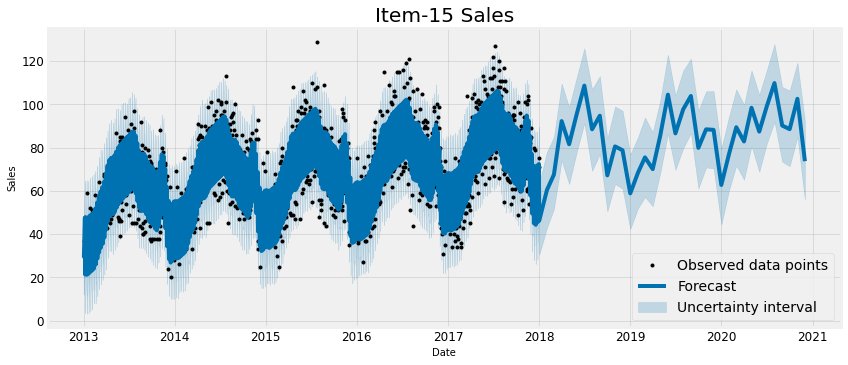

In [388]:
item15_forecast = it15_model.make_future_dataframe(periods = 36,freq = 'MS')
item15_forecast = it15_model.predict(item1_forecast)
it15_model.plot(item15_forecast,xlabel ='Date', ylabel ='Sales',figsize=(12,5))
plt.title('Item-15 Sales')
plt.legend()

### Forecasting for item-25

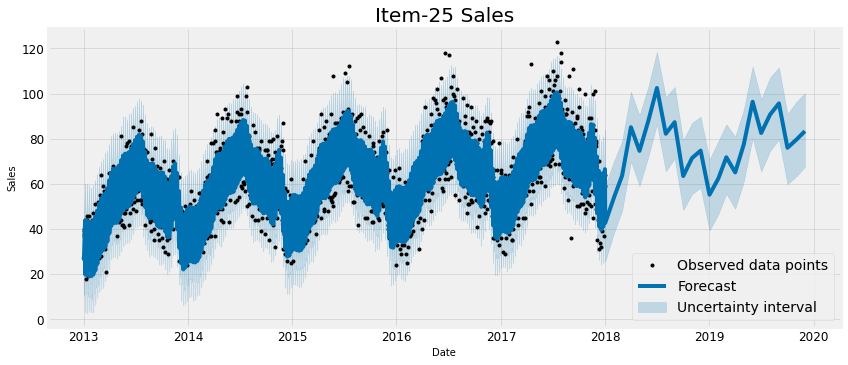

In [389]:
item25_forecast = it25_model.make_future_dataframe(periods = 24,freq = 'MS')
item25_forecast = it25_model.predict(item25_forecast)
it25_model.plot(item25_forecast,xlabel ='Date', ylabel ='Sales',figsize=(12,5))
plt.title('Item-25 Sales')
plt.legend()

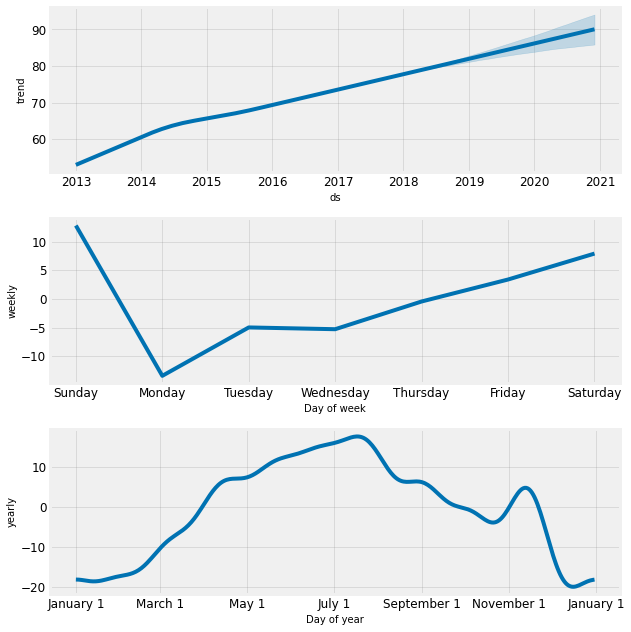

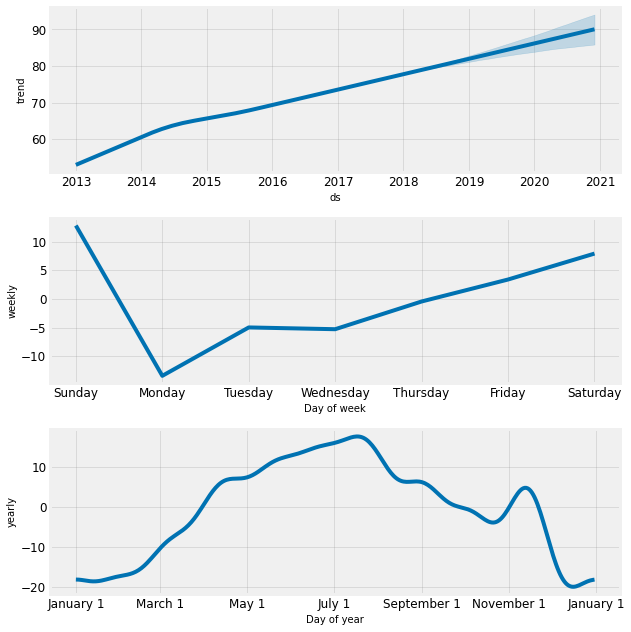

In [378]:
it15_model.plot_components(item15_forecast)

=======================

### Performance metrics

=======================

In [379]:
from prophet.diagnostics import cross_validation,performance_metrics

In [380]:
it15_model_cv = cross_validation(it15_model,initial = '730 days',period = '180 days',horizon = '365 days')
it15_model_cv.head(3)

  0%|          | 0/5 [00:00<?, ?it/s]

15:29:07 - cmdstanpy - INFO - Chain [1] start processing
15:29:07 - cmdstanpy - INFO - Chain [1] done processing
15:29:09 - cmdstanpy - INFO - Chain [1] start processing
15:29:09 - cmdstanpy - INFO - Chain [1] done processing
15:29:12 - cmdstanpy - INFO - Chain [1] start processing
15:29:12 - cmdstanpy - INFO - Chain [1] done processing
15:29:14 - cmdstanpy - INFO - Chain [1] start processing
15:29:14 - cmdstanpy - INFO - Chain [1] done processing
15:29:17 - cmdstanpy - INFO - Chain [1] start processing
15:29:17 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-12,39.708298,23.171538,55.937433,34,2015-01-11
1,2015-01-13,46.724493,31.656087,64.683197,50,2015-01-11
2,2015-01-14,47.088916,30.727732,63.183070,51,2015-01-11


In [381]:
it15_model_pm = performance_metrics(it15_model_cv)
it15_model_pm.head(3)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,89.639940,9.467837,7.355639,0.125607,0.095142,0.118034,0.923077
1,38 days,89.939824,9.483661,7.360359,0.125818,0.095142,0.118232,0.923077
2,39 days,92.894051,9.638156,7.545286,0.129429,0.101160,0.121378,0.917582


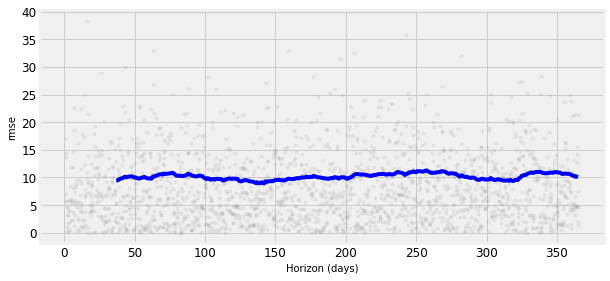

In [391]:
from prophet.plot import plot_cross_validation_metric
figure = plot_cross_validation_metric(it15_model_cv,metric = 'rmse',figsize =(9,4))

=============================================================================================================

## RESULT:

Time series analysis is performed on the above dataset and product sales is forecasted by both sarimax and prophet model.

==============================================================================================================